In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
cars_df = pd.read_csv('cars_cleaned.csv')

In [3]:
cars_df.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
cars_df['DATE_SOLD'] = pd.to_datetime(cars_df['DATE_SOLD'])

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   URL                895 non-null    object        
 1   VIN                895 non-null    object        
 2   YEAR               895 non-null    int64         
 3   MILEAGE            895 non-null    object        
 4   EXT_COLOR          895 non-null    object        
 5   INT_COLOR          895 non-null    object        
 6   TRANSMISSION       895 non-null    object        
 7   BODY_STYLE         895 non-null    object        
 8   LOCATION           895 non-null    object        
 9   DATE_SOLD          895 non-null    datetime64[ns]
 10  SELLER_TYPE        895 non-null    object        
 11  NUM_PHOTOS         895 non-null    float64       
 12  SALE_PRICE         895 non-null    float64       
 13  RESULT             895 non-null    object        
 14  STATE     

In [6]:
cars_df['AGE_WHEN_SOLD'] = cars_df['DATE_SOLD'].dt.year - cars_df['YEAR']

In [7]:
cars_df['DATE_TO_ORDINAL'] = cars_df['DATE_SOLD'].map(datetime.toordinal)

In [8]:
cars_df = pd.get_dummies(cars_df, columns = ['TRANSMISSION_TYPE'], drop_first = True)

In [9]:
cars_df = pd.get_dummies(cars_df, columns = ['EXT_COLOR_CLEANED'], drop_first = True)

In [10]:
cars_df = pd.get_dummies(cars_df, columns = ['BODY_STYLE'], drop_first = True)

In [11]:
cars_df = pd.get_dummies(cars_df, columns = ['SELLER_TYPE'], drop_first = True)

In [12]:
cars_df = pd.get_dummies(cars_df, columns = ['RESULT'], drop_first = True)

In [61]:
cars_df['LOG_MILEAGE'] = np.log(cars_df['MILEAGE_CLEAN'])

In [73]:
cars_df[cars_df['MILEAGE_CLEAN'] < 1000]

URL                VIN  \
683  https://bringatrailer.com/listing/2004-bmw-m3-21/  WBSBL93454PN59133   
735  https://bringatrailer.com/listing/2012-bmw-m3-...  WBSPK91060E810823   

     YEAR          MILEAGE                     EXT_COLOR  \
683  2004        176 miles         carbon black metallic   
735  2012  711 Miles Shown  frozen polar silver metallic   

                     INT_COLOR                      TRANSMISSION  \
683        black nappa leather       6-speed SMG II Transmission   
735  orange leather upholstery  7-Speed Dual-Clutch Transmission   

                                         LOCATION  DATE_SOLD  NUM_PHOTOS  ...  \
683               Location: Makawao, Hawaii 96768 2018-08-09       147.0  ...   
735  Location: Huntington Station, New York 11746 2021-08-31       127.0  ...   

     EXT_COLOR_CLEANED_Red EXT_COLOR_CLEANED_Silver  EXT_COLOR_CLEANED_Violet  \
683                      0                        0                         0   
735                      0                        1                         0   

     EXT_COLOR_CLEANED_White  EXT_COLOR_CLEANED_Yellow  BODY_STYLE_Hard top  \
683                        0                         0                    1   
735                        0                         0                    1   

     SELLER_TYPE_private party  RESULT_Sold  LOG_MILEAGE  MILEAGE_INVERSE  
683                          1            0     5.170484         0.005682  
735                          0            0     6.566672         0.001406  

[2 rows x 31 columns]

In [98]:
cars_df.head()

URL                VIN  YEAR  \
0  https://bringatrailer.com/listing/1999-bmw-m3-...  WBSBG9335XEY80827  1999   
1  https://bringatrailer.com/listing/1998-bmw-m3-...  WBSBG9326WEY77926  1998   
2  https://bringatrailer.com/listing/1999-bmw-m3-...  WB5BG9334XEY83671  1999   
3  https://bringatrailer.com/listing/1998-bmw-m3-...  WBSCD9326WEE08819  1998   
4  https://bringatrailer.com/listing/1995-bmw-m3-...  WBSBF9323SEH03781  1995   

           MILEAGE                    EXT_COLOR  \
0        66k Miles        estoril blue metallic   
1       103k Miles                 alpine white   
2        81k Miles  estoril blue metallic paint   
3  89k Miles Shown     titanium silver metallic   
4      162K Miles           brilliant red paint   

                             INT_COLOR                    TRANSMISSION  \
0  light grey nappa leather upholstery  Five-Speed Manual Transmission   
1                  black nappa leather  Five-Speed Manual Transmission   
2                  black nappa leather  Five-Speed Manual Transmission   
3              gray leather upholstery  Five-Speed Manual Transmission   
4       black nappa leather upholstery  Five-Speed Manual Transmission   

                                LOCATION  DATE_SOLD  NUM_PHOTOS  ...  \
0  Location: Fullerton, California 92833 2021-09-24       222.0  ...   
1       Location: Portland, Oregon 97209 2021-09-22       245.0  ...   
2           Location: Bend, Oregon 97701 2021-09-15       264.0  ...   
3   Location: Lake Placid, Florida 33852 2021-09-14       116.0  ...   
4        Location: Muncie, Indiana 47303 2021-09-10       215.0  ...   

   EXT_COLOR_CLEANED_Orange EXT_COLOR_CLEANED_Red EXT_COLOR_CLEANED_Silver  \
0                         0                     0                        0   
1                         0                     0                        0   
2                         0                     0                        0   
3                         0                     0                        1   
4                         0                     1                        0   

   EXT_COLOR_CLEANED_Violet EXT_COLOR_CLEANED_White  EXT_COLOR_CLEANED_Yellow  \
0                         0                       0                         0   
1                         0                       1                         0   
2                         0                       0                         0   
3                         0                       0                         0   
4                         0                       0                         0   

   BODY_STYLE_Hard top  LOG_MILEAGE  AGE_WHEN_SOLD  SELLER_TYPE_private party  
0                    1    11.097410             22                          1  
1                    1    11.542484             23                          0  
2                    1    11.302204             22                          1  
3                    1    11.396392             23                          1  
4                    1    11.995352             26                          0  

[5 rows x 30 columns]

In [50]:
sns.pairplot(cars_df[['SALE_PRICE', 'MILEAGE_CLEAN', 'MILEAGE_INVERSE', 'YEAR', 'AGE_WHEN_SOLD', 'NUM_PHOTOS', 'DATE_TO_ORDINAL']]);

In [51]:
cars_df[['SALE_PRICE', 'MILEAGE_CLEAN', 'LOG_MILEAGE', 'YEAR', 'AGE_WHEN_SOLD', 'NUM_PHOTOS', 'DATE_TO_ORDINAL']].corr()

SALE_PRICE  MILEAGE_CLEAN  LOG_MILEAGE      YEAR  \
SALE_PRICE         1.000000      -0.583189    -0.615759  0.472826   
MILEAGE_CLEAN     -0.583189       1.000000     0.833499 -0.417688   
LOG_MILEAGE       -0.615759       0.833499     1.000000 -0.383544   
YEAR               0.472826      -0.417688    -0.383544  1.000000   
AGE_WHEN_SOLD     -0.405725       0.412189     0.385722 -0.969747   
NUM_PHOTOS         0.218655      -0.031762    -0.031190 -0.044772   
DATE_TO_ORDINAL    0.278991      -0.027489     0.002676  0.089513   

                 AGE_WHEN_SOLD  NUM_PHOTOS  DATE_TO_ORDINAL  
SALE_PRICE           -0.405725    0.218655         0.278991  
MILEAGE_CLEAN         0.412189   -0.031762        -0.027489  
LOG_MILEAGE           0.385722   -0.031190         0.002676  
YEAR                 -0.969747   -0.044772         0.089513  
AGE_WHEN_SOLD         1.000000    0.118754         0.149821  
NUM_PHOTOS            0.118754    1.000000         0.326935  
DATE_TO_ORDINAL       0.149821    0.326935         1.000000

In [39]:
cars_df['YEAR'].max()

2013

In [62]:
X = cars_df['LOG_MILEAGE'].values.reshape(-1, 1)
y = cars_df['SALE_PRICE']

In [63]:
X, X_test, y, y_test = train_test_split(X, y, test_size = .2, random_state = 5)

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=5)

In [65]:
lm = LinearRegression()
scaler = StandardScaler()

In [66]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [67]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
lm.score(X_val_scaled, y_val)

0.28813715402055917

In [69]:
y_val_pred = lm.predict(X_val_scaled)

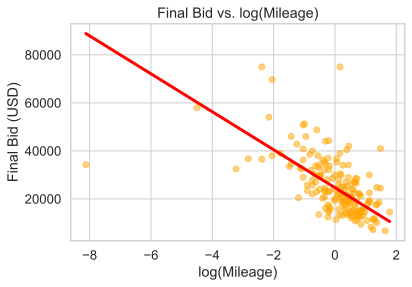

In [70]:
plt.scatter(X_val_scaled, y_val, color = 'orange', alpha = 0.5)
plt.plot(X_val_scaled, y_val_pred, color = 'red', linewidth = 3)
plt.xlabel('log(Mileage)')
plt.ylabel('Final Bid (USD)')
plt.title('Final Bid vs. log(Mileage)')
plt.savefig('bid_vs_log_mileage.png', facecolor = 'w', bbox_inches = 'tight');

In [138]:
# X = cars_df[['LOG_MILEAGE', 'AGE_WHEN_SOLD', 'YEAR', 'RESULT_Sold', 'DATE_TO_ORDINAL', 'NUM_PHOTOS', 'TRANSMISSION_DUMMY', 'EXT_COLOR_CLEANED_Blue', 'BODY_STYLE_Hard top', 'SELLER_TYPE_private party']]
# X = cars_df['LOG_MILEAGE'].values.reshape(-1,1)
# Y = cars_df['SALE_PRICE']

In [139]:
lr.fit(X, y)

LinearRegression()

In [140]:
lr.score(X, Y)

0.6317311340403313

In [132]:
y_pred = lr.predict(X)

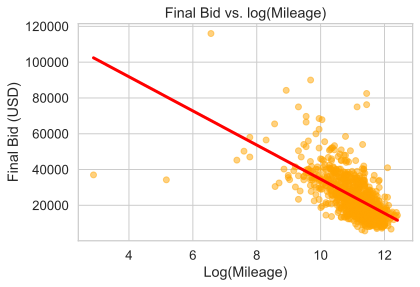

In [82]:
plt.scatter(X, Y, color = 'orange', alpha = 0.5)
plt.plot(X, y_pred, color = 'red', linewidth = 3)
plt.xlabel('Log(Mileage)')
plt.ylabel('Final Bid (USD)')
plt.title('Final Bid vs. log(Mileage)');